In [1]:
import hydra
from omegaconf import OmegaConf
import pyrootutils

root = pyrootutils.setup_root(".", pythonpath=True)
model_cfg = OmegaConf.load(root / "configs" / "model" / "ddpm_cifar.yaml")
model_cfg.ckpt_path = "../checkpoints/last.ckpt"
model = hydra.utils.instantiate(model_cfg)

/home/hoang/miniconda3/envs/hoang/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DDPM: Running in eps-prediction mode
Keeping EMAs of 492.
Restored from ../checkpoints/last.ckpt with 0 missing and 12 unexpected keys
Unexpected Keys: ['betas', 'alphas_cumprod', 'alphas_cumprod_prev', 'sqrt_alphas_cumprod', 'sqrt_one_minus_alphas_cumprod', 'log_one_minus_alphas_cumprod', 'sqrt_recip_alphas_cumprod', 'sqrt_recipm1_alphas_cumprod', 'posterior_variance', 'posterior_log_variance_clipped', 'posterior_mean_coef1', 'posterior_mean_coef2']


In [7]:
import torch
torch.cuda.empty_cache()
model = model.cuda()

n_samples = 2
samples = model.sample(batch_size=n_samples)

Sampling t: 100%|██████████| 1000/1000 [00:56<00:00, 17.79it/s]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


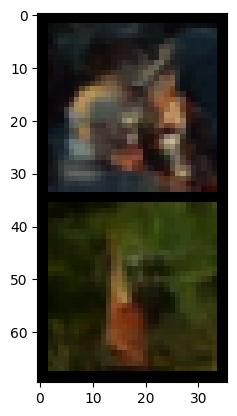

In [8]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from math import sqrt
grid = make_grid(samples.cpu(), nrow=int(sqrt(n_samples)))

plt.imshow(grid.moveaxis(0, -1).numpy())